# Levensverwachting:
  ###       Onderzoek in 18 landen over de laatste 58 jaar

Onderzoeksvragen:
    
    1. Hoe heeft in de afgelopen 6 decennia de levensverwachting bij geboorte zich in 18 landen ontwikkeld?
    
    2. Welke landen laten hierin een positieve en welke een negatieve ontwikkeling zien?
    
    3. In welke landen heeft de bevolking een hoge levensverwachting bij geboorte en in welke landen is het minder hoog?
    
    4. Hoe sterk en in welke richting is de relatie tussen GDP en Life expectancy at birth?
    
    5. Hoe sterk en in welke richting is de relatie tussen Mortality rate en Life expectancy at birth?
    
    6. Hoe sterk en in welke richting is de relatie tussen Health expenditure en Life expectancy at birth?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [18]:
le = pd.read_csv('Data_LifeExpectancy_(inGeneral).csv')

le.drop([18, 19, 20, 21, 22], inplace=True)
le.drop(['Country Code', 'Series Name', 'Series Code', '2016 [YR2016]', '2017 [YR2017]'], axis=1, inplace=True)

le.set_index('Country Name', inplace=True)

In [19]:
le2 = le.T
year = (["1960",  "1961",  "1962",  "1963",  "1964",  "1965",  "1966",  "1967",  "1968",  "1969",  "1970",  "1971",  "1972",  "1973",  "1974",  "1975",  "1976",  "1977",  "1978",  "1979",  "1980",  "1981",  "1982",  "1983",  "1984",  "1985",  "1986",  "1987",  "1988",  "1989",  "1990",  "1991",  "1992",  "1993",  "1994",  "1995",  "1996",  "1997",  "1998",  "1999",  "2000",  "2001",  "2002",  "2003",  "2004",  "2005",  "2006",  "2007",  "2008",  "2009",  "2010",  "2011",  "2012",  "2013",  "2014",  "2015"
        ])
le2.insert(0, 'year', year)

In [20]:
df_le = pd.DataFrame(le2)
df_le.rename(columns={"Netherlands": "NL", "Venezuela, RB": "Venezuela", "United Kingdom": "UK", "United States": "USA"}, inplace=True)
df_le.year = pd.to_datetime(df_le.year)
df_le.set_index("year", inplace=True)

# Hoe heeft in de afgelopen 6 decennia de levensverwachting bij geboorte zich in 18 landen ontwikkeld?

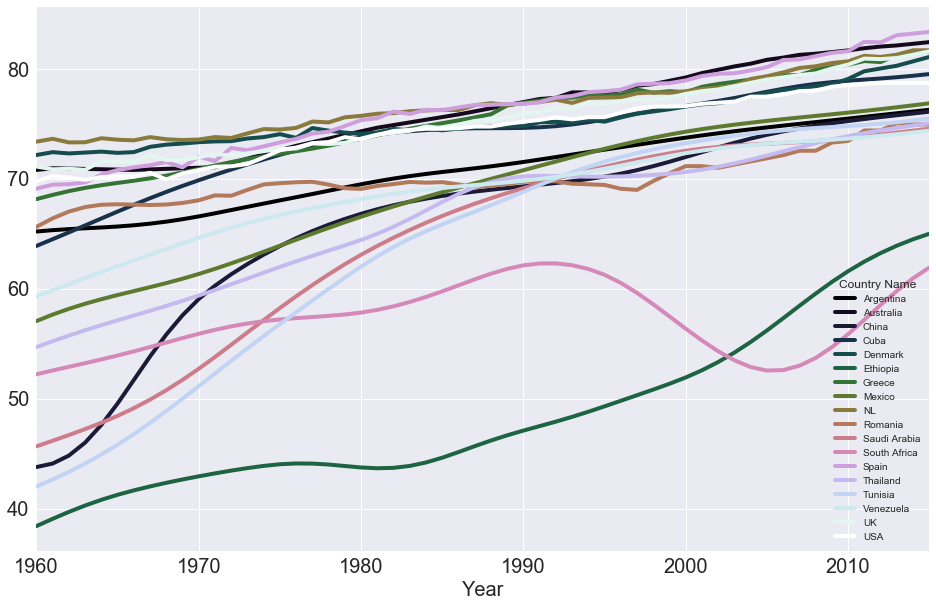

In [21]:
from matplotlib import cm
plt.figure()
df_le.plot(figsize=(16,10), linewidth=4, fontsize=20, colormap=cm.cubehelix)
plt.xlabel('Year', fontsize=20);

# Welke landen laten hierin een positieve en welke een negatieve ontwikkeling zien?

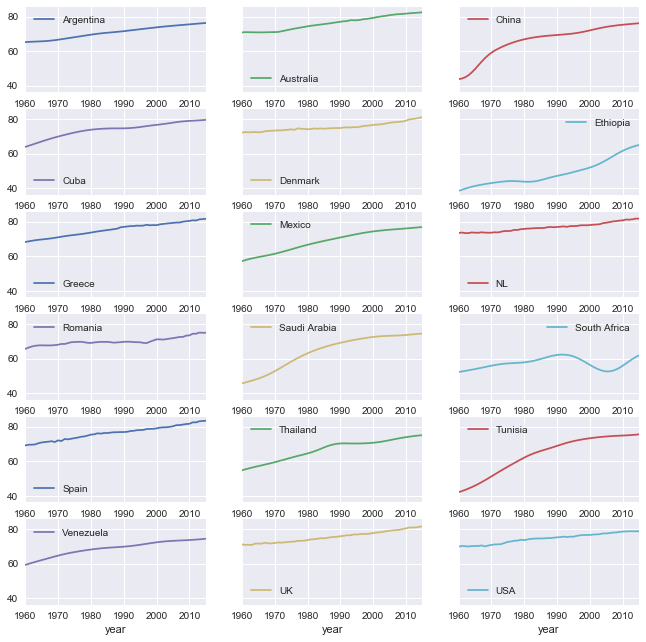

In [22]:
df_le.plot(subplots=True, layout=(6, -1), figsize=(11, 11), sharex=False, sharey=True);

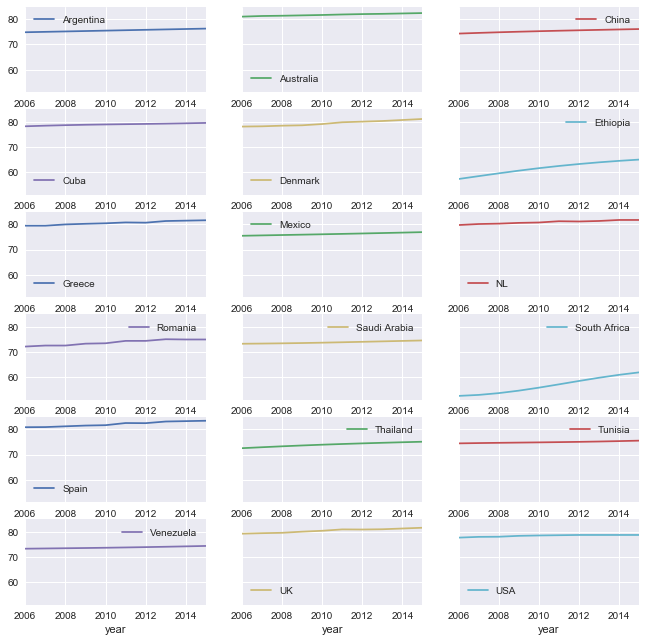

In [23]:
tenYrs = df_le['2006':'2015']
tenYrs.plot(subplots=True, layout=(6, -1), figsize=(11, 11), sharex=False, sharey=True);

# In welke landen heeft de bevolking een hoge levensverwachting bij geboorte en in welke landen is het minder hoog?

In [24]:
highest = df_le['2015':'2015']
hT = highest.T
top6 = hT.sort_values(by='2015-01-01 00:00:00', ascending=False).head(6)
top6

year          2015-01-01
Country Name            
Spain          83.380488
Australia      82.451220
NL             81.707317
UK             81.604878
Greece         81.587805
Denmark        81.100000

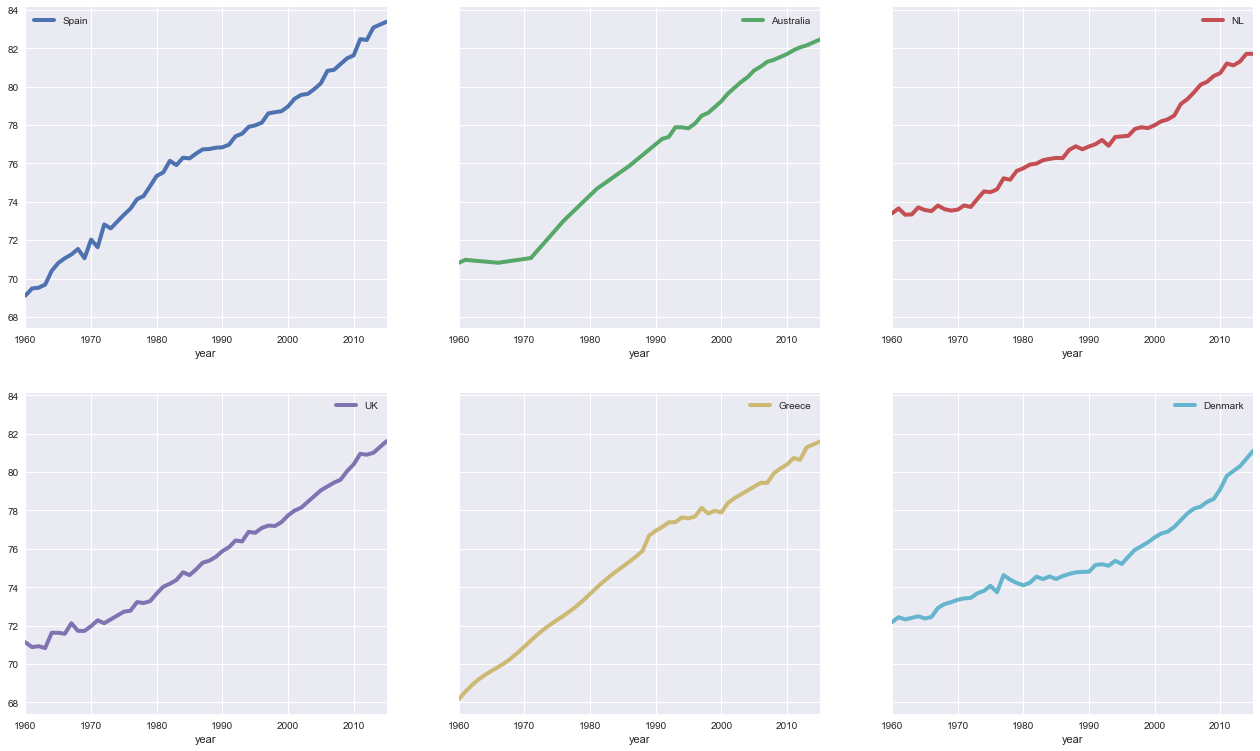

In [25]:
top6 = df_le[['Spain', 'Australia', 'NL', 'UK', 'Greece', 'Denmark']]
top6.plot(subplots=True, layout=(2, -1), figsize=(22, 13), linewidth=4, sharex=False, sharey=True);

In [26]:
lowest = df_le['2015':'2015']
loT = lowest.T
down6 = loT.sort_values(by='2015-01-01 00:00:00').head(6)
down6

year          2015-01-01
Country Name            
South Africa   61.934098
Ethiopia       65.008293
Venezuela      74.391512
Saudi Arabia   74.574488
Romania        74.960976
Thailand       75.068000

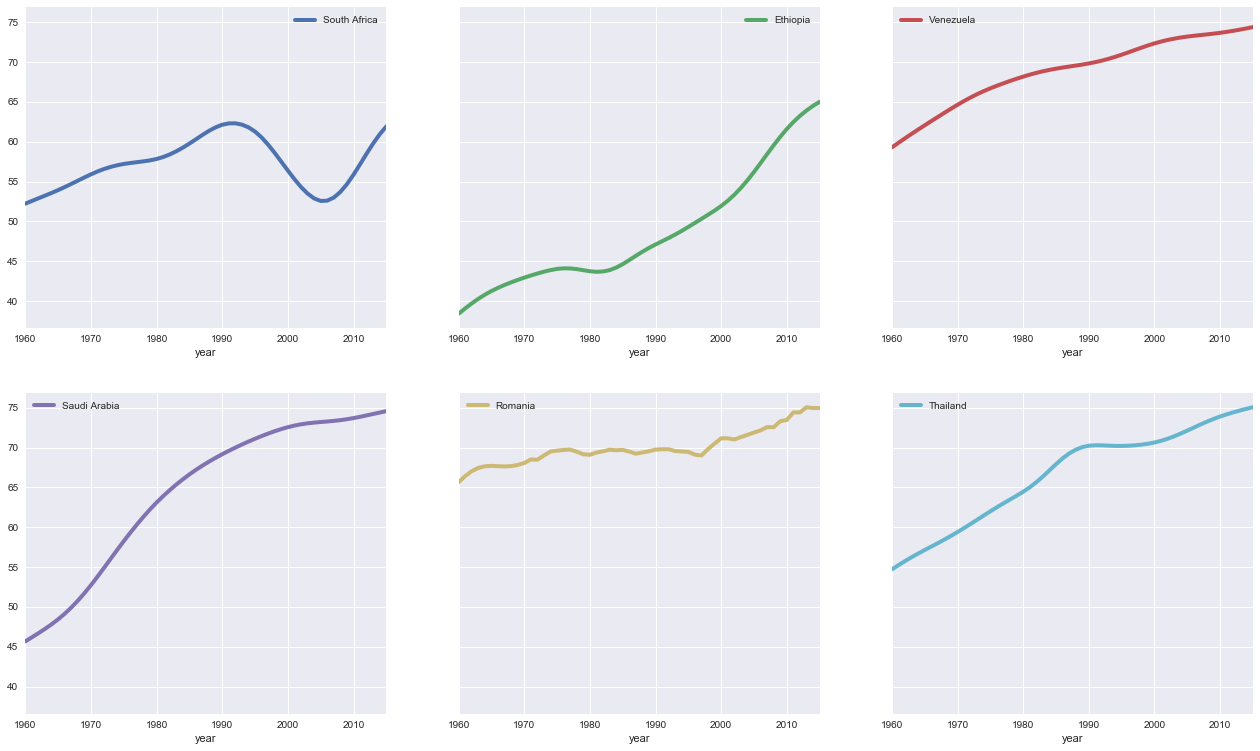

In [27]:
down6 = df_le[['South Africa', 'Ethiopia', 'Venezuela', 'Saudi Arabia', 'Romania', 'Thailand']]
down6.plot(subplots=True, layout=(2, -1), figsize=(22, 13), linewidth=4, sharex=False, sharey=True);

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [29]:
gdp = pd.read_csv('DATA_GDP.csv')
gdp.set_index('Country Name', inplace=True)
gdp.drop(gdp.index[[18,19,20,21,22,23]], inplace=True)
gdp.drop(['Country Code', 'Series Name', 'Series Code'], axis=1, inplace=True)
gdp.sort_index(inplace=True)

In [30]:
gdp['1960 [YR1960]'] = pd.to_numeric(gdp['1960 [YR1960]'], errors = 'coerce')
gdp['1961 [YR1961]'] = pd.to_numeric(gdp['1961 [YR1961]'], errors = 'coerce')
gdp['1962 [YR1962]'] = pd.to_numeric(gdp['1962 [YR1962]'], errors = 'coerce')
gdp['1963 [YR1963]'] = pd.to_numeric(gdp['1963 [YR1963]'], errors = 'coerce')
gdp['1964 [YR1964]'] = pd.to_numeric(gdp['1964 [YR1964]'], errors = 'coerce')
gdp['1965 [YR1965]'] = pd.to_numeric(gdp['1965 [YR1965]'], errors = 'coerce')
gdp['1966 [YR1966]'] = pd.to_numeric(gdp['1966 [YR1966]'], errors = 'coerce')
gdp['1967 [YR1967]'] = pd.to_numeric(gdp['1967 [YR1967]'], errors = 'coerce')
gdp['1968 [YR1968]'] = pd.to_numeric(gdp['1968 [YR1968]'], errors = 'coerce')
gdp['1969 [YR1969]'] = pd.to_numeric(gdp['1969 [YR1969]'], errors = 'coerce')
gdp['1970 [YR1970]'] = pd.to_numeric(gdp['1970 [YR1970]'], errors = 'coerce')
gdp['1971 [YR1971]'] = pd.to_numeric(gdp['1971 [YR1971]'], errors = 'coerce')
gdp['1972 [YR1972]'] = pd.to_numeric(gdp['1972 [YR1972]'], errors = 'coerce')
gdp['1973 [YR1973]'] = pd.to_numeric(gdp['1973 [YR1973]'], errors = 'coerce')
gdp['1974 [YR1974]'] = pd.to_numeric(gdp['1974 [YR1974]'], errors = 'coerce')
gdp['1975 [YR1975]'] = pd.to_numeric(gdp['1975 [YR1975]'], errors = 'coerce')
gdp['1976 [YR1976]'] = pd.to_numeric(gdp['1976 [YR1976]'], errors = 'coerce')
gdp['1977 [YR1977]'] = pd.to_numeric(gdp['1977 [YR1977]'], errors = 'coerce')
gdp['1978 [YR1978]'] = pd.to_numeric(gdp['1978 [YR1978]'], errors = 'coerce')
gdp['1979 [YR1979]'] = pd.to_numeric(gdp['1979 [YR1979]'], errors = 'coerce')
gdp['1980 [YR1980]'] = pd.to_numeric(gdp['1980 [YR1980]'], errors = 'coerce')
gdp['1981 [YR1981]'] = pd.to_numeric(gdp['1981 [YR1981]'], errors = 'coerce')
gdp['1982 [YR1982]'] = pd.to_numeric(gdp['1982 [YR1982]'], errors = 'coerce')
gdp['1983 [YR1983]'] = pd.to_numeric(gdp['1983 [YR1983]'], errors = 'coerce')
gdp['1984 [YR1984]'] = pd.to_numeric(gdp['1984 [YR1984]'], errors = 'coerce')
gdp['1985 [YR1985]'] = pd.to_numeric(gdp['1985 [YR1985]'], errors = 'coerce')
gdp['1986 [YR1986]'] = pd.to_numeric(gdp['1986 [YR1986]'], errors = 'coerce')
gdp['1987 [YR1987]'] = pd.to_numeric(gdp['1987 [YR1987]'], errors = 'coerce')
gdp['1988 [YR1988]'] = pd.to_numeric(gdp['1988 [YR1988]'], errors = 'coerce')
gdp['1989 [YR1989]'] = pd.to_numeric(gdp['1989 [YR1989]'], errors = 'coerce')
gdp['1990 [YR1990]'] = pd.to_numeric(gdp['1990 [YR1990]'], errors = 'coerce')
gdp['1991 [YR1991]'] = pd.to_numeric(gdp['1991 [YR1991]'], errors = 'coerce')
gdp['1992 [YR1992]'] = pd.to_numeric(gdp['1992 [YR1992]'], errors = 'coerce')
gdp['1993 [YR1993]'] = pd.to_numeric(gdp['1993 [YR1993]'], errors = 'coerce')
gdp['1994 [YR1994]'] = pd.to_numeric(gdp['1994 [YR1994]'], errors = 'coerce')
gdp['1995 [YR1995]'] = pd.to_numeric(gdp['1995 [YR1995]'], errors = 'coerce')
gdp['1996 [YR1996]'] = pd.to_numeric(gdp['1996 [YR1996]'], errors = 'coerce')
gdp['1997 [YR1997]'] = pd.to_numeric(gdp['1997 [YR1997]'], errors = 'coerce')
gdp['1998 [YR1998]'] = pd.to_numeric(gdp['1998 [YR1998]'], errors = 'coerce')
gdp['1999 [YR1999]'] = pd.to_numeric(gdp['1999 [YR1999]'], errors = 'coerce')
gdp['2000 [YR2000]'] = pd.to_numeric(gdp['2000 [YR2000]'], errors = 'coerce')
gdp['2001 [YR2001]'] = pd.to_numeric(gdp['2001 [YR2001]'], errors = 'coerce')
gdp['2002 [YR2002]'] = pd.to_numeric(gdp['2002 [YR2002]'], errors = 'coerce')
gdp['2003 [YR2003]'] = pd.to_numeric(gdp['2003 [YR2003]'], errors = 'coerce')
gdp['2004 [YR2004]'] = pd.to_numeric(gdp['2004 [YR2004]'], errors = 'coerce')
gdp['2005 [YR2005]'] = pd.to_numeric(gdp['2005 [YR2005]'], errors = 'coerce')
gdp['2006 [YR2006]'] = pd.to_numeric(gdp['2006 [YR2006]'], errors = 'coerce')
gdp['2007 [YR2007]'] = pd.to_numeric(gdp['2007 [YR2007]'], errors = 'coerce')
gdp['2008 [YR2008]'] = pd.to_numeric(gdp['2008 [YR2008]'], errors = 'coerce')
gdp['2009 [YR2009]'] = pd.to_numeric(gdp['2009 [YR2009]'], errors = 'coerce')
gdp['2010 [YR2010]'] = pd.to_numeric(gdp['2010 [YR2010]'], errors = 'coerce')
gdp['2011 [YR2011]'] = pd.to_numeric(gdp['2011 [YR2011]'], errors = 'coerce')
gdp['2012 [YR2012]'] = pd.to_numeric(gdp['2012 [YR2012]'], errors = 'coerce')
gdp['2013 [YR2013]'] = pd.to_numeric(gdp['2013 [YR2013]'], errors = 'coerce')
gdp['2014 [YR2014]'] = pd.to_numeric(gdp['2014 [YR2014]'], errors = 'coerce')
gdp['2015 [YR2015]'] = pd.to_numeric(gdp['2015 [YR2015]'], errors = 'coerce')
gdp['2016 [YR2016]'] = pd.to_numeric(gdp['2016 [YR2016]'], errors = 'coerce')
gdp['2017 [YR2017]'] = pd.to_numeric(gdp['2017 [YR2017]'], errors = 'coerce')

In [31]:
gdpT = gdp.T

In [32]:
birth = pd.read_csv('Data_LifeExpectancy_(inGeneral).csv')
birth.set_index('Country Name', inplace=True)
birth.drop(birth.index[[18,19,20,21,22]], inplace=True)
birth.drop(['Country Code', 'Series Name', 'Series Code'], axis=1, inplace=True)
birth.sort_index(inplace=True)

In [33]:
birth['1960 [YR1960]'] = pd.to_numeric(birth['1960 [YR1960]'], errors = 'coerce')
birth['1961 [YR1961]'] = pd.to_numeric(birth['1961 [YR1961]'], errors = 'coerce')
birth['1962 [YR1962]'] = pd.to_numeric(birth['1962 [YR1962]'], errors = 'coerce')
birth['1963 [YR1963]'] = pd.to_numeric(birth['1963 [YR1963]'], errors = 'coerce')
birth['1964 [YR1964]'] = pd.to_numeric(birth['1964 [YR1964]'], errors = 'coerce')
birth['1965 [YR1965]'] = pd.to_numeric(birth['1965 [YR1965]'], errors = 'coerce')
birth['1966 [YR1966]'] = pd.to_numeric(birth['1966 [YR1966]'], errors = 'coerce')
birth['1967 [YR1967]'] = pd.to_numeric(birth['1967 [YR1967]'], errors = 'coerce')
birth['1968 [YR1968]'] = pd.to_numeric(birth['1968 [YR1968]'], errors = 'coerce')
birth['1969 [YR1969]'] = pd.to_numeric(birth['1969 [YR1969]'], errors = 'coerce')
birth['1970 [YR1970]'] = pd.to_numeric(birth['1970 [YR1970]'], errors = 'coerce')
birth['1971 [YR1971]'] = pd.to_numeric(birth['1971 [YR1971]'], errors = 'coerce')
birth['1972 [YR1972]'] = pd.to_numeric(birth['1972 [YR1972]'], errors = 'coerce')
birth['1973 [YR1973]'] = pd.to_numeric(birth['1973 [YR1973]'], errors = 'coerce')
birth['1974 [YR1974]'] = pd.to_numeric(birth['1974 [YR1974]'], errors = 'coerce')
birth['1975 [YR1975]'] = pd.to_numeric(birth['1975 [YR1975]'], errors = 'coerce')
birth['1976 [YR1976]'] = pd.to_numeric(birth['1976 [YR1976]'], errors = 'coerce')
birth['1977 [YR1977]'] = pd.to_numeric(birth['1977 [YR1977]'], errors = 'coerce')
birth['1978 [YR1978]'] = pd.to_numeric(birth['1978 [YR1978]'], errors = 'coerce')
birth['1979 [YR1979]'] = pd.to_numeric(birth['1979 [YR1979]'], errors = 'coerce')
birth['1980 [YR1980]'] = pd.to_numeric(birth['1980 [YR1980]'], errors = 'coerce')
birth['1981 [YR1981]'] = pd.to_numeric(birth['1981 [YR1981]'], errors = 'coerce')
birth['1982 [YR1982]'] = pd.to_numeric(birth['1982 [YR1982]'], errors = 'coerce')
birth['1983 [YR1983]'] = pd.to_numeric(birth['1983 [YR1983]'], errors = 'coerce')
birth['1984 [YR1984]'] = pd.to_numeric(birth['1984 [YR1984]'], errors = 'coerce')
birth['1985 [YR1985]'] = pd.to_numeric(birth['1985 [YR1985]'], errors = 'coerce')
birth['1986 [YR1986]'] = pd.to_numeric(birth['1986 [YR1986]'], errors = 'coerce')
birth['1987 [YR1987]'] = pd.to_numeric(birth['1987 [YR1987]'], errors = 'coerce')
birth['1988 [YR1988]'] = pd.to_numeric(birth['1988 [YR1988]'], errors = 'coerce')
birth['1989 [YR1989]'] = pd.to_numeric(birth['1989 [YR1989]'], errors = 'coerce')
birth['1990 [YR1990]'] = pd.to_numeric(birth['1990 [YR1990]'], errors = 'coerce')
birth['1991 [YR1991]'] = pd.to_numeric(birth['1991 [YR1991]'], errors = 'coerce')
birth['1992 [YR1992]'] = pd.to_numeric(birth['1992 [YR1992]'], errors = 'coerce')
birth['1993 [YR1993]'] = pd.to_numeric(birth['1993 [YR1993]'], errors = 'coerce')
birth['1994 [YR1994]'] = pd.to_numeric(birth['1994 [YR1994]'], errors = 'coerce')
birth['1995 [YR1995]'] = pd.to_numeric(birth['1995 [YR1995]'], errors = 'coerce')
birth['1996 [YR1996]'] = pd.to_numeric(birth['1996 [YR1996]'], errors = 'coerce')
birth['1997 [YR1997]'] = pd.to_numeric(birth['1997 [YR1997]'], errors = 'coerce')
birth['1998 [YR1998]'] = pd.to_numeric(birth['1998 [YR1998]'], errors = 'coerce')
birth['1999 [YR1999]'] = pd.to_numeric(birth['1999 [YR1999]'], errors = 'coerce')
birth['2000 [YR2000]'] = pd.to_numeric(birth['2000 [YR2000]'], errors = 'coerce')
birth['2001 [YR2001]'] = pd.to_numeric(birth['2001 [YR2001]'], errors = 'coerce')
birth['2002 [YR2002]'] = pd.to_numeric(birth['2002 [YR2002]'], errors = 'coerce')
birth['2003 [YR2003]'] = pd.to_numeric(birth['2003 [YR2003]'], errors = 'coerce')
birth['2004 [YR2004]'] = pd.to_numeric(birth['2004 [YR2004]'], errors = 'coerce')
birth['2005 [YR2005]'] = pd.to_numeric(birth['2005 [YR2005]'], errors = 'coerce')
birth['2006 [YR2006]'] = pd.to_numeric(birth['2006 [YR2006]'], errors = 'coerce')
birth['2007 [YR2007]'] = pd.to_numeric(birth['2007 [YR2007]'], errors = 'coerce')
birth['2008 [YR2008]'] = pd.to_numeric(birth['2008 [YR2008]'], errors = 'coerce')
birth['2009 [YR2009]'] = pd.to_numeric(birth['2009 [YR2009]'], errors = 'coerce')
birth['2010 [YR2010]'] = pd.to_numeric(birth['2010 [YR2010]'], errors = 'coerce')
birth['2011 [YR2011]'] = pd.to_numeric(birth['2011 [YR2011]'], errors = 'coerce')
birth['2012 [YR2012]'] = pd.to_numeric(birth['2012 [YR2012]'], errors = 'coerce')
birth['2013 [YR2013]'] = pd.to_numeric(birth['2013 [YR2013]'], errors = 'coerce')
birth['2014 [YR2014]'] = pd.to_numeric(birth['2014 [YR2014]'], errors = 'coerce')
birth['2015 [YR2015]'] = pd.to_numeric(birth['2015 [YR2015]'], errors = 'coerce')
birth['2016 [YR2016]'] = pd.to_numeric(birth['2016 [YR2016]'], errors = 'coerce')
birth['2017 [YR2017]'] = pd.to_numeric(birth['2017 [YR2017]'], errors = 'coerce')

In [34]:
birthT = birth.T

In [35]:
mort = pd.read_csv('Data_MortalityRate.csv')
mort.set_index('Country Name', inplace=True)
mort.drop(mort.index[[18,19,20,21,22]], inplace=True)
mort.drop(['Country Code', 'Series Name', 'Series Code'], axis=1, inplace=True)
mort.sort_index(inplace=True)

In [36]:
mort['1960 [YR1960]'] = pd.to_numeric(mort['1960 [YR1960]'], errors = 'coerce')
mort['1961 [YR1961]'] = pd.to_numeric(mort['1961 [YR1961]'], errors = 'coerce')
mort['1962 [YR1962]'] = pd.to_numeric(mort['1962 [YR1962]'], errors = 'coerce')
mort['1963 [YR1963]'] = pd.to_numeric(mort['1963 [YR1963]'], errors = 'coerce')
mort['1964 [YR1964]'] = pd.to_numeric(mort['1964 [YR1964]'], errors = 'coerce')
mort['1965 [YR1965]'] = pd.to_numeric(mort['1965 [YR1965]'], errors = 'coerce')
mort['1966 [YR1966]'] = pd.to_numeric(mort['1966 [YR1966]'], errors = 'coerce')
mort['1967 [YR1967]'] = pd.to_numeric(mort['1967 [YR1967]'], errors = 'coerce')
mort['1968 [YR1968]'] = pd.to_numeric(mort['1968 [YR1968]'], errors = 'coerce')
mort['1969 [YR1969]'] = pd.to_numeric(mort['1969 [YR1969]'], errors = 'coerce')
mort['1970 [YR1970]'] = pd.to_numeric(mort['1970 [YR1970]'], errors = 'coerce')
mort['1971 [YR1971]'] = pd.to_numeric(mort['1971 [YR1971]'], errors = 'coerce')
mort['1972 [YR1972]'] = pd.to_numeric(mort['1972 [YR1972]'], errors = 'coerce')
mort['1973 [YR1973]'] = pd.to_numeric(mort['1973 [YR1973]'], errors = 'coerce')
mort['1974 [YR1974]'] = pd.to_numeric(mort['1974 [YR1974]'], errors = 'coerce')
mort['1975 [YR1975]'] = pd.to_numeric(mort['1975 [YR1975]'], errors = 'coerce')
mort['1976 [YR1976]'] = pd.to_numeric(mort['1976 [YR1976]'], errors = 'coerce')
mort['1977 [YR1977]'] = pd.to_numeric(mort['1977 [YR1977]'], errors = 'coerce')
mort['1978 [YR1978]'] = pd.to_numeric(mort['1978 [YR1978]'], errors = 'coerce')
mort['1979 [YR1979]'] = pd.to_numeric(mort['1979 [YR1979]'], errors = 'coerce')
mort['1980 [YR1980]'] = pd.to_numeric(mort['1980 [YR1980]'], errors = 'coerce')
mort['1981 [YR1981]'] = pd.to_numeric(mort['1981 [YR1981]'], errors = 'coerce')
mort['1982 [YR1982]'] = pd.to_numeric(mort['1982 [YR1982]'], errors = 'coerce')
mort['1983 [YR1983]'] = pd.to_numeric(mort['1983 [YR1983]'], errors = 'coerce')
mort['1984 [YR1984]'] = pd.to_numeric(mort['1984 [YR1984]'], errors = 'coerce')
mort['1985 [YR1985]'] = pd.to_numeric(mort['1985 [YR1985]'], errors = 'coerce')
mort['1986 [YR1986]'] = pd.to_numeric(mort['1986 [YR1986]'], errors = 'coerce')
mort['1987 [YR1987]'] = pd.to_numeric(mort['1987 [YR1987]'], errors = 'coerce')
mort['1988 [YR1988]'] = pd.to_numeric(mort['1988 [YR1988]'], errors = 'coerce')
mort['1989 [YR1989]'] = pd.to_numeric(mort['1989 [YR1989]'], errors = 'coerce')
mort['1990 [YR1990]'] = pd.to_numeric(mort['1990 [YR1990]'], errors = 'coerce')
mort['1991 [YR1991]'] = pd.to_numeric(mort['1991 [YR1991]'], errors = 'coerce')
mort['1992 [YR1992]'] = pd.to_numeric(mort['1992 [YR1992]'], errors = 'coerce')
mort['1993 [YR1993]'] = pd.to_numeric(mort['1993 [YR1993]'], errors = 'coerce')
mort['1994 [YR1994]'] = pd.to_numeric(mort['1994 [YR1994]'], errors = 'coerce')
mort['1995 [YR1995]'] = pd.to_numeric(mort['1995 [YR1995]'], errors = 'coerce')
mort['1996 [YR1996]'] = pd.to_numeric(mort['1996 [YR1996]'], errors = 'coerce')
mort['1997 [YR1997]'] = pd.to_numeric(mort['1997 [YR1997]'], errors = 'coerce')
mort['1998 [YR1998]'] = pd.to_numeric(mort['1998 [YR1998]'], errors = 'coerce')
mort['1999 [YR1999]'] = pd.to_numeric(mort['1999 [YR1999]'], errors = 'coerce')
mort['2000 [YR2000]'] = pd.to_numeric(mort['2000 [YR2000]'], errors = 'coerce')
mort['2001 [YR2001]'] = pd.to_numeric(mort['2001 [YR2001]'], errors = 'coerce')
mort['2002 [YR2002]'] = pd.to_numeric(mort['2002 [YR2002]'], errors = 'coerce')
mort['2003 [YR2003]'] = pd.to_numeric(mort['2003 [YR2003]'], errors = 'coerce')
mort['2004 [YR2004]'] = pd.to_numeric(mort['2004 [YR2004]'], errors = 'coerce')
mort['2005 [YR2005]'] = pd.to_numeric(mort['2005 [YR2005]'], errors = 'coerce')
mort['2006 [YR2006]'] = pd.to_numeric(mort['2006 [YR2006]'], errors = 'coerce')
mort['2007 [YR2007]'] = pd.to_numeric(mort['2007 [YR2007]'], errors = 'coerce')
mort['2008 [YR2008]'] = pd.to_numeric(mort['2008 [YR2008]'], errors = 'coerce')
mort['2009 [YR2009]'] = pd.to_numeric(mort['2009 [YR2009]'], errors = 'coerce')
mort['2010 [YR2010]'] = pd.to_numeric(mort['2010 [YR2010]'], errors = 'coerce')
mort['2011 [YR2011]'] = pd.to_numeric(mort['2011 [YR2011]'], errors = 'coerce')
mort['2012 [YR2012]'] = pd.to_numeric(mort['2012 [YR2012]'], errors = 'coerce')
mort['2013 [YR2013]'] = pd.to_numeric(mort['2013 [YR2013]'], errors = 'coerce')
mort['2014 [YR2014]'] = pd.to_numeric(mort['2014 [YR2014]'], errors = 'coerce')
mort['2015 [YR2015]'] = pd.to_numeric(mort['2015 [YR2015]'], errors = 'coerce')
mort['2016 [YR2016]'] = pd.to_numeric(mort['2016 [YR2016]'], errors = 'coerce')
mort['2017 [YR2017]'] = pd.to_numeric(mort['2017 [YR2017]'], errors = 'coerce')

In [37]:
mortT = mort.T

In [38]:
exp = pd.read_csv('Data_HealthCosts.csv')
exp.set_index('Country Name', inplace=True)
exp.drop(exp.index[[18,19,20,21,22]], inplace=True)
exp.drop(['Country Code', 'Series Name', 'Series Code'], axis=1, inplace=True)
exp.sort_index(inplace=True)

In [39]:
exp['1960 [YR1960]'] = pd.to_numeric(exp['1960 [YR1960]'], errors = 'coerce')
exp['1961 [YR1961]'] = pd.to_numeric(exp['1961 [YR1961]'], errors = 'coerce')
exp['1962 [YR1962]'] = pd.to_numeric(exp['1962 [YR1962]'], errors = 'coerce')
exp['1963 [YR1963]'] = pd.to_numeric(exp['1963 [YR1963]'], errors = 'coerce')
exp['1964 [YR1964]'] = pd.to_numeric(exp['1964 [YR1964]'], errors = 'coerce')
exp['1965 [YR1965]'] = pd.to_numeric(exp['1965 [YR1965]'], errors = 'coerce')
exp['1966 [YR1966]'] = pd.to_numeric(exp['1966 [YR1966]'], errors = 'coerce')
exp['1967 [YR1967]'] = pd.to_numeric(exp['1967 [YR1967]'], errors = 'coerce')
exp['1968 [YR1968]'] = pd.to_numeric(exp['1968 [YR1968]'], errors = 'coerce')
exp['1969 [YR1969]'] = pd.to_numeric(exp['1969 [YR1969]'], errors = 'coerce')
exp['1970 [YR1970]'] = pd.to_numeric(exp['1970 [YR1970]'], errors = 'coerce')
exp['1971 [YR1971]'] = pd.to_numeric(exp['1971 [YR1971]'], errors = 'coerce')
exp['1972 [YR1972]'] = pd.to_numeric(exp['1972 [YR1972]'], errors = 'coerce')
exp['1973 [YR1973]'] = pd.to_numeric(exp['1973 [YR1973]'], errors = 'coerce')
exp['1974 [YR1974]'] = pd.to_numeric(exp['1974 [YR1974]'], errors = 'coerce')
exp['1975 [YR1975]'] = pd.to_numeric(exp['1975 [YR1975]'], errors = 'coerce')
exp['1976 [YR1976]'] = pd.to_numeric(exp['1976 [YR1976]'], errors = 'coerce')
exp['1977 [YR1977]'] = pd.to_numeric(exp['1977 [YR1977]'], errors = 'coerce')
exp['1978 [YR1978]'] = pd.to_numeric(exp['1978 [YR1978]'], errors = 'coerce')
exp['1979 [YR1979]'] = pd.to_numeric(exp['1979 [YR1979]'], errors = 'coerce')
exp['1980 [YR1980]'] = pd.to_numeric(exp['1980 [YR1980]'], errors = 'coerce')
exp['1981 [YR1981]'] = pd.to_numeric(exp['1981 [YR1981]'], errors = 'coerce')
exp['1982 [YR1982]'] = pd.to_numeric(exp['1982 [YR1982]'], errors = 'coerce')
exp['1983 [YR1983]'] = pd.to_numeric(exp['1983 [YR1983]'], errors = 'coerce')
exp['1984 [YR1984]'] = pd.to_numeric(exp['1984 [YR1984]'], errors = 'coerce')
exp['1985 [YR1985]'] = pd.to_numeric(exp['1985 [YR1985]'], errors = 'coerce')
exp['1986 [YR1986]'] = pd.to_numeric(exp['1986 [YR1986]'], errors = 'coerce')
exp['1987 [YR1987]'] = pd.to_numeric(exp['1987 [YR1987]'], errors = 'coerce')
exp['1988 [YR1988]'] = pd.to_numeric(exp['1988 [YR1988]'], errors = 'coerce')
exp['1989 [YR1989]'] = pd.to_numeric(exp['1989 [YR1989]'], errors = 'coerce')
exp['1990 [YR1990]'] = pd.to_numeric(exp['1990 [YR1990]'], errors = 'coerce')
exp['1991 [YR1991]'] = pd.to_numeric(exp['1991 [YR1991]'], errors = 'coerce')
exp['1992 [YR1992]'] = pd.to_numeric(exp['1992 [YR1992]'], errors = 'coerce')
exp['1993 [YR1993]'] = pd.to_numeric(exp['1993 [YR1993]'], errors = 'coerce')
exp['1994 [YR1994]'] = pd.to_numeric(exp['1994 [YR1994]'], errors = 'coerce')
exp['1995 [YR1995]'] = pd.to_numeric(exp['1995 [YR1995]'], errors = 'coerce')
exp['1996 [YR1996]'] = pd.to_numeric(exp['1996 [YR1996]'], errors = 'coerce')
exp['1997 [YR1997]'] = pd.to_numeric(exp['1997 [YR1997]'], errors = 'coerce')
exp['1998 [YR1998]'] = pd.to_numeric(exp['1998 [YR1998]'], errors = 'coerce')
exp['1999 [YR1999]'] = pd.to_numeric(exp['1999 [YR1999]'], errors = 'coerce')
exp['2000 [YR2000]'] = pd.to_numeric(exp['2000 [YR2000]'], errors = 'coerce')
exp['2001 [YR2001]'] = pd.to_numeric(exp['2001 [YR2001]'], errors = 'coerce')
exp['2002 [YR2002]'] = pd.to_numeric(exp['2002 [YR2002]'], errors = 'coerce')
exp['2003 [YR2003]'] = pd.to_numeric(exp['2003 [YR2003]'], errors = 'coerce')
exp['2004 [YR2004]'] = pd.to_numeric(exp['2004 [YR2004]'], errors = 'coerce')
exp['2005 [YR2005]'] = pd.to_numeric(exp['2005 [YR2005]'], errors = 'coerce')
exp['2006 [YR2006]'] = pd.to_numeric(exp['2006 [YR2006]'], errors = 'coerce')
exp['2007 [YR2007]'] = pd.to_numeric(exp['2007 [YR2007]'], errors = 'coerce')
exp['2008 [YR2008]'] = pd.to_numeric(exp['2008 [YR2008]'], errors = 'coerce')
exp['2009 [YR2009]'] = pd.to_numeric(exp['2009 [YR2009]'], errors = 'coerce')
exp['2010 [YR2010]'] = pd.to_numeric(exp['2010 [YR2010]'], errors = 'coerce')
exp['2011 [YR2011]'] = pd.to_numeric(exp['2011 [YR2011]'], errors = 'coerce')
exp['2012 [YR2012]'] = pd.to_numeric(exp['2012 [YR2012]'], errors = 'coerce')
exp['2013 [YR2013]'] = pd.to_numeric(exp['2013 [YR2013]'], errors = 'coerce')
exp['2014 [YR2014]'] = pd.to_numeric(exp['2014 [YR2014]'], errors = 'coerce')
exp['2015 [YR2015]'] = pd.to_numeric(exp['2015 [YR2015]'], errors = 'coerce')
exp['2016 [YR2016]'] = pd.to_numeric(exp['2016 [YR2016]'], errors = 'coerce')
exp['2017 [YR2017]'] = pd.to_numeric(exp['2017 [YR2017]'], errors = 'coerce')

In [40]:
expT = exp.T

# Hoe sterk en in welke richting is de relatie tussen GDP en Life expectancy at birth?¶

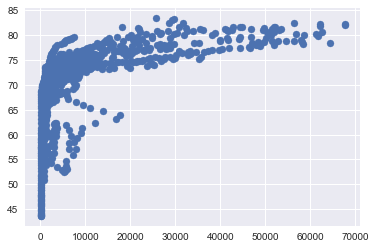

In [48]:
plt.scatter(gdp, birth)
plt.show()

# Hoe sterk en in welke richting is de relatie tussen Mortality rate en Life expectancy at birth?

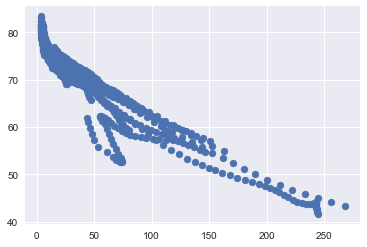

In [42]:
plt.scatter(mort, birth)
plt.show()

# Hoe sterk en in welke richting is de relatie tussen Health expenditure en Life expectancy at birth?

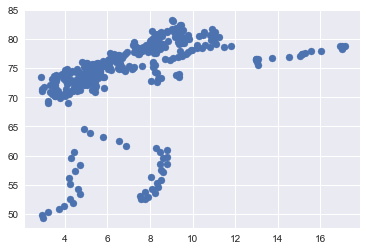

In [43]:
plt.scatter(exp, birth)
plt.show()